# Signal Processing home assignement 1
## Deterministic signals: convolutions and Fourier transforms

This tutorial investigates deterministic signals, their Fourier transforms and convolutions.

*This home assignement is to be completed individually. For theory questions, feel free to provide complementary hand-written notes or (alternatively) type your answere inside the notebook.*

*Grading: (normal) points are indicated for each question, additional bonus points are granted for some questions and indicated as such. Bonus points are not necessary to reach the 100% of the points (define as the total all available normal points), but will be added to the total of normal points, up to the limit of 100% of available normal points. Points are attributed based on the correctness of the code and calculation, but also on the quality of the explanations provided. Please provide the reasoning that supports your answers.*

To do this assignement we need a Python 3 distribution with the following libraries:

In [1]:
# import numpy for array manipulation and fft
import numpy as np
# import filtering functionalities from scipy.signal
from scipy.signal import lfilter, filtfilt, butter
# plotting functionalities
import matplotlib.pyplot as plt


If you want to give back the assignement as a jupyter notebook, the following command triggers inline plot.

In [2]:
%matplotlib inline

The following command allows reuse of figures in different cells.

In [3]:
# %config InlineBackend.close_figures=False  

### Basic representation of signals
We will use a numerical representation of signals, we will assume the following setting:

 - continuous signals are sampled at sampling period of $dt$ seconds
 - as a consequence, the sampling frequency is $F$ is $1/dt$ Hz

Here is a basic example of how to plot the representation of a continuous time signal ($\cos(2\pi t)$) using its sampled version in numpy:

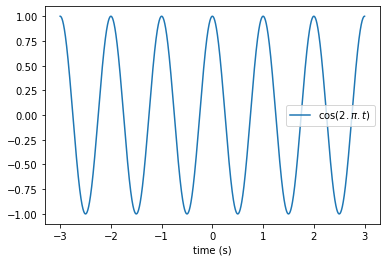

In [4]:
# define sampling frequency
dt=.001;
# define time axis
t = np.arange(-3,3,dt)
# sample a continuous function, e.g. 1-periodic cosine at these time points
x = np.cos(2*np.pi*t)
plt.plot(t,x,label=r'$\cos(2.\pi.t)$')
plt.xlabel('time (s)')
plt.legend()

If we want to plot the discretized signal for what it is, i.e. a finite sequence of numbers, we can use *stem*, however this is easy to visualize only for few samples

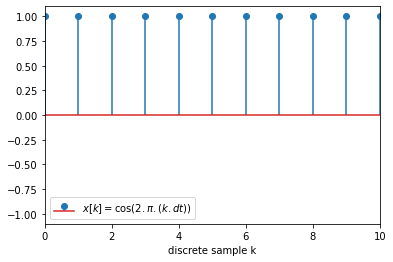

In [5]:
plt.stem(x,use_line_collection=True,label=r'$x[k]=\cos(2.\pi.(k.dt))$')
plt.xlim([0, 10])
plt.xlabel('discrete sample k')
plt.legend()

Alternatively we can just use the plot function, and only the x-axis changes

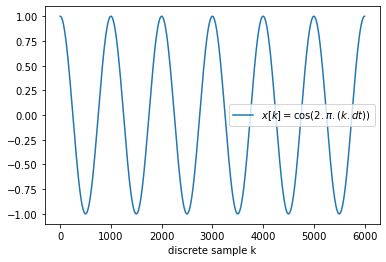

In [6]:
plt.plot(x,label=r'$x[k]=\cos(2.\pi.(k.dt))$')
plt.xlabel('discrete sample k')
plt.legend()

## Part 1: Fourier analysis

We will now use the [Fast Fourier Transform](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm) algorithm to compute the DFT of a given finite sample signal. This will be further exploited to estimate DTFTs and CTFTs.

We fix the size of the signals to K=10:

In [7]:
K=10

Check the documentation of the numpy FFT function np.fft.fft

In [8]:
help(np.fft.fft)

Help on function fft in module numpy.fft:

fft(a, n=None, axis=-1, norm=None)
    Compute the one-dimensional discrete Fourier Transform.
    
    This function computes the one-dimensional *n*-point discrete Fourier
    Transform (DFT) with the efficient Fast Fourier Transform (FFT)
    algorithm [CT].
    
    Parameters
    ----------
    a : array_like
        Input array, can be complex.
    n : int, optional
        Length of the transformed axis of the output.
        If `n` is smaller than the length of the input, the input is cropped.
        If it is larger, the input is padded with zeros.  If `n` is not given,
        the length of the input along the axis specified by `axis` is used.
    axis : int, optional
        Axis over which to compute the FFT.  If not given, the last axis is
        used.
    norm : {None, "ortho"}, optional
        .. versionadded:: 1.10.0
    
        Normalization mode (see `numpy.fft`). Default is None.
    
    Returns
    -------
    out : com

**Question 1**:
 - a) for a multidimensional array, on which axis operates the fft algorithm? (1 pt.)

*If the axis is specified, the FFT will be computed on that axis. Otherwise, it will be computed over the last axis.*

- b) after ploting the time course of the length $K$ signal, 
$$
x[k]=\cos(4\pi k/K),k=0,\,1,\,\dots,\,K-1
$$
compute and plot the real and imaginary part of its $n$ point DFT using the about fft code. Interpret the location and magnitude of the peaks of the DFT. (2 pts.)

*Hint 1: define the signal in time domain as a variable 'delta'*

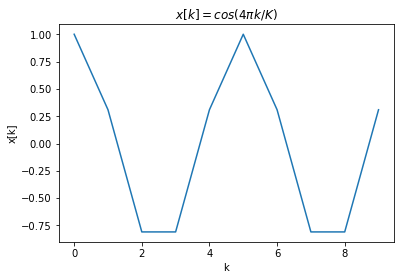

In [9]:
k = np.arange(0, K)
delta = np.cos((4*np.pi/K)*k)

plt.plot(k, delta)
plt.xlabel("k")
plt.ylabel("x[k]")
plt.title(r"$x[k] = cos(4 \pi k/K)$")
plt.show()

*Hint 2: compute fft $X$ of the signal $x$*

In [10]:
delta_FFT = np.fft.fft(delta)

*Hint 3: plot the real and imaginary part in the same plot, with legends as "real" and "imag.".*

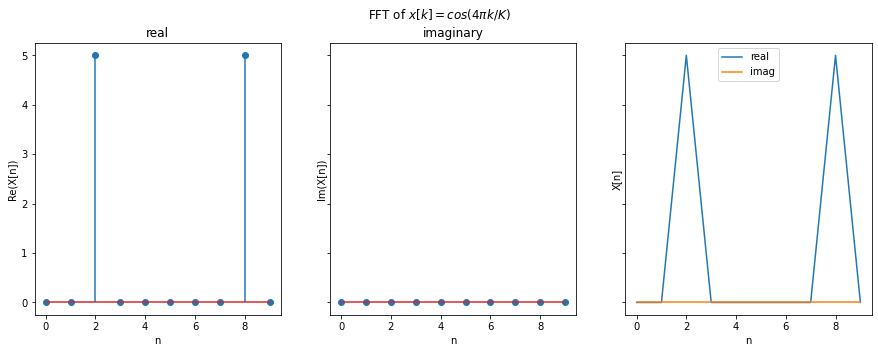

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)

ax[0].stem(k, delta_FFT.real)
ax[0].set_title("real")
ax[0].set_ylabel("Re(X[n])")
ax[0].set_xlabel("n")

ax[1].stem(k, delta_FFT.imag)
ax[1].set_title("imaginary")
ax[1].set_ylabel("Im(X[n])")
ax[1].set_xlabel("n")

ax[2].plot(k, delta_FFT.real, label='real')
ax[2].plot(k, delta_FFT.imag, label='imag')
ax[2].set_ylabel("X[n]")
ax[2].set_xlabel("n")

plt.legend()

plt.suptitle(r"FFT of $x[k] = cos(4 \pi k/K)$")
plt.show()

- c) same question for the two sampled shifted vector 
$k\mapsto \cos(4π(k-2)/K)$, restricted to $k=0,\,1,\,\dots,\,K-1$. 

Note that due to the $K$ periodicity of the function $k\mapsto\cos(4πk/K)$ this implements a circular shift with lag $k_0=2$ of the above length $K$ vector $x$
$$
x_{circ\, shift\, k_0}[k]=x[(k-k_0)\, \mbox{mod}\, K]
$$
where $k\mapsto k\,\mbox{mod}\, K$ implements the modulo operation, computing the remainder of the integer division of $k$ by $K$ (in practice, coefficients that are shifted ''out'' of the support on the right-hand side are reinjected on the left-hand-side).  (2 pts.)

*Hint 1: define the signal in time domain as a variable 'x_shifted'*

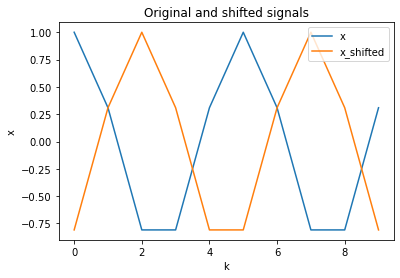

In [12]:
x_shifted = np.roll(delta, 2)

plt.plot(k, delta, label='x')
plt.plot(k, x_shifted, label='x_shifted')
plt.xlabel("k")
plt.ylabel("x")
plt.title("Original and shifted signals")
plt.legend()
plt.show()

*Hint 2: compute fft of the signal 'x_shifted'*

In [13]:
x_shifted_FFT = np.fft.fft(x_shifted)

*Hint 3: plot the real and imaginary part in the same plot, with legends as "real" and "imag.".*

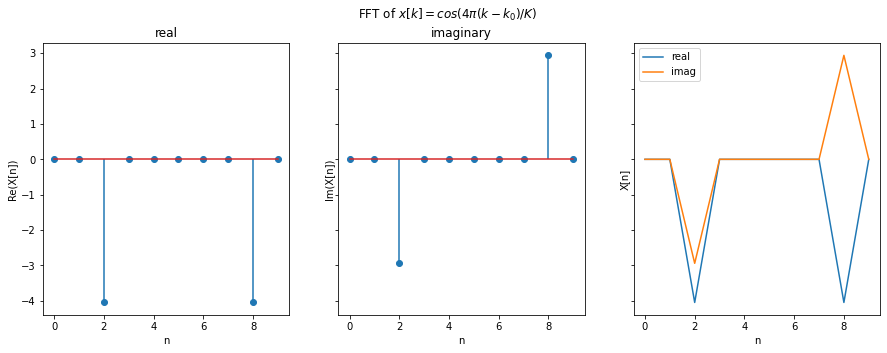

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)

ax[0].stem(k, x_shifted_FFT.real)
ax[0].set_title("real")
ax[0].set_ylabel("Re(X[n])")
ax[0].set_xlabel("n")

ax[1].stem(k, x_shifted_FFT.imag)
ax[1].set_title("imaginary")
ax[1].set_ylabel("Im(X[n])")
ax[1].set_xlabel("n")

ax[2].plot(k, x_shifted_FFT.real, label='real')
ax[2].plot(k, x_shifted_FFT.imag, label='imag')
ax[2].set_ylabel("X[n]")
ax[2].set_xlabel("n")

plt.legend()
plt.suptitle(r"FFT of $x[k] = cos(4 \pi (k-k_0)/K)$")
plt.show()

- d) based on the DFT definition and calculation rules in the lecture, derive the analytical expression of the DFT of a (circularly) shifted signal and check (by plotting those expressions) that the results match the computations done by np.fft.fft (2 points)

$$
X_{shifted}[2] = 5 e^{\frac{-i 8 \pi}{10}} \\
X_{shifted}[-2] = 5 e^{\frac{i 8 \pi}{10}}
$$

**(Please refer to handwritten notes for the derivation)**

In [15]:
x_shifted_2 = 5*np.exp(-1j * 8 * np.pi / 10)
x_shifted_neg_2 = 5*np.exp(1j * 8 * np.pi / 10)

print("DFT at n = 2: ")
print(np.round(x_shifted_2))
print("DFT at n = -2: ")
print(np.round(x_shifted_neg_2))

DFT at n = 2: 
(-4-3j)
DFT at n = -2: 
(-4+3j)


$$
X_{shifted}[2] = 5 e^{\frac{-i 8 \pi}{10}} = -4-3i\\
X_{shifted}[-2] = 5 e^{\frac{i 8 \pi}{10}} = -4+3i
$$

**DFT coefficients computed by hand are equal to the values obtained using np.fft**

## From DFT to DTFT 
To estimate the Fourier transform of a continuous time signal, we can **approximate it by the DTFT (which also cannot in general be computed numerically, due to the inifinite sum), which itself can be approximated by the DFT. We first focus on 
approximating the DTFT of an infinite sequences (discrete time signal), using the DFT (and its implementation throught the FFT algorithm).**

Assume we want to approximate the continuous time triangular signal of width $T$, resulting from a self-convolution of the rectangular function, $x(t) = \text{Rect}_T *\text{Rect}_T (t) $ with $T=1$ (see lecture notes).

In [16]:
T = 1
def Tri(t,T):
    x = (T-np.abs(t/T))*(np.abs(t)<T)
    return x.astype(np.float)

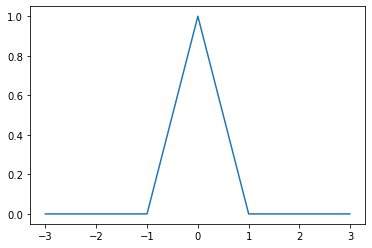

In [17]:
t = np.arange(-3, 3, 0.01)
plt.plot(t, Tri(t, T))

For that we sample the signal at a frequency F (in Hz). This leads to an infinite sequence $$x_d[k]=x(k/F)\,,$$ for $k= -\infty,\cdots, -1,0,1,\cdots, +\infty$. 

We then extract the values take on a finite interval of integers the form $[-K,-K+1,...,K-1,K]$.
This gives a *vector* of length $2K+1$, $$x_v[j],j\in 0,..,2K$$.

**Question 2:**
 - a) For $j=0,\,\dots,2K$, write the expression $x_v[j]$ of each component of the vector as a function of $x_d$ (for an arbitrary sampled continuous time function $x(t)$). (2 points)
 
*Hint: Keep in mind for a given index $k$, $x_d[k]$ does not in general correspond to $x_v[k]$, due to the chosen interval (symmetric around zero).*

$$
x_v[j] = x_d[-K+j]
$$

**(Please see handwritten notes as well)**

 - b) Assume the support of $x(t)$ is fully covered by the finite sampling introduced above, what is the relationship between the (2K+1)-point DFT of $x_v$ at point $n$ and the DTFT of $x_d$ at normalized frequency $n/(2K+1)$? (use the lecture, 3 pt.)
 

$$
X_v[n] = X_d\left(\omega =  \frac{2 \pi n}{2K+1} \right) e^{\frac{-i2 \pi n K}{2K + 1}} \\
X_v[n] = X_d\left(f =  \frac{n}{2K+1} \right) e^{\frac{-i2 \pi n K}{2K + 1}}
$$

**(Please refer to handwritten notes for derivation)**

- c) Given that a circular permutation $v'$ of $m$ steps towards the left for a $N$-dimensional vector $v$  leads to the N point DFT $F_N v'[n]=\exp(2 \pi i m n/N) F_N v[n]$, how can we compute the DTFT of the signal $x_d$ defined above, at normalized frequency $\nu=n/(2K+1)$, using the vector $x_v$ defined above. (2 points)

$x_v$ is a circular permutation of $x_d$ $K$ steps to the **right**. Therefore:

$$
F_N x_v[n] = \exp(- 2 \pi i K n/(2K+1)) F_N x_d[n] \\
F_N x_d[n] = \exp(2 \pi i K n/(2K+1)) F_N x_v[n]
$$

Where $F_N x_d[n]$ is the DTFT of $x_d$ at normalized frequency $\nu=n/(2K+1)$

- d) Can we use a simpler expression to compute the absolute value of the same DTFT? (1 pt.)

*$F_N x_d$ is equal to $F_N x_v$ times a complex number which lies on the unit circle and has magnitude = 1. Hence, the absolute values of $F_N x_d$ and $F_N x_v$ are equal to each other.*

- e) Define the vector $x_v$ in python according to the above specification, for $F=10Hz$ and $K=20$, and then compute its DFT using np.fft.fft (real and imaginary part). (2 pts.)

*Hint 1: design the signal using the function Rect(t,T) defined above*

Text(0.5, 1.0, '$x_v$')

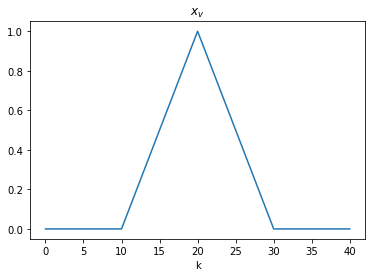

In [18]:
K = 20
F = 10
T = 1

x_v = Tri(np.linspace(start=-K/F, stop=K/F, num=2*K+1), T)

plt.plot(x_v)
plt.xlabel("k")
plt.title(r"$x_v$")

*Hint 2: compute DTF and plot the real/imaginary parts, together with the absolute value*

Text(0.5, 1.0, 'Absolute value of DFT of $x_v$')

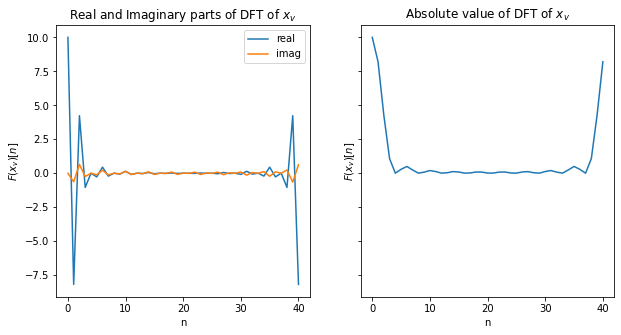

In [19]:
x_v_DFT = np.fft.fft(x_v)

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].plot(range(2*K+1), x_v_DFT.real, label='real')
ax[0].plot(range(2*K+1), x_v_DFT.imag, label='imag')
ax[0].set_xlabel("n")
ax[0].set_ylabel(r"$F(x_v)[n]$")
ax[0].legend()
ax[0].set_title(r"Real and Imaginary parts of DFT of $x_v$")

ax[1].plot(range(2*K+1), np.absolute(x_v_DFT))
ax[1].set_xlabel("n")
ax[1].set_ylabel(r"$F(x_v)[n]$")
ax[1].set_title(r"Absolute value of DFT of $x_v$")

 - f) Use the above theory to compute the DTFT of $x_d$ for the original signal $x=\text{Rect}_1 * \text{Rect}_1$ function. Plot this DTFT on an appropriately chosen frequency grid with $2K+1$ elements. (2 points)
 
 *Hint 1: define a grid for $2K+1$ normalized frequencies from 0 to 1 as a variable "nuax"*

In [20]:
# nuax = np.linspace(start=0, stop=1, num=2*K+1)
nuax = np.arange(0, 1, step=1/(2*K+1))

*Hint 2: compute DTFT of $x_d$ according to c).*

In [21]:
xd_DTFT = np.multiply(x_v_DFT, np.exp(1j*nuax*2*np.pi*K))

 - g) Use the function np.fft.fftshift in order to plot the DTFT on a frequency axis centered around 0. (2 pts.)

*Hint 1: use fftshift to put center frequency around zero*

In [22]:
help(np.fft.fftshift)

Help on function fftshift in module numpy.fft:

fftshift(x, axes=None)
    Shift the zero-frequency component to the center of the spectrum.
    
    This function swaps half-spaces for all axes listed (defaults to all).
    Note that ``y[0]`` is the Nyquist component only if ``len(x)`` is even.
    
    Parameters
    ----------
    x : array_like
        Input array.
    axes : int or shape tuple, optional
        Axes over which to shift.  Default is None, which shifts all axes.
    
    Returns
    -------
    y : ndarray
        The shifted array.
    
    See Also
    --------
    ifftshift : The inverse of `fftshift`.
    
    Examples
    --------
    >>> freqs = np.fft.fftfreq(10, 0.1)
    >>> freqs
    array([ 0.,  1.,  2., ..., -3., -2., -1.])
    >>> np.fft.fftshift(freqs)
    array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])
    
    Shift the zero-frequency component only along the second axis:
    
    >>> freqs = np.fft.fftfreq(9, d=1./9).reshape(3, 3)
    >>> f

In [23]:
xd_DTFT_shifted = np.fft.fftshift(xd_DTFT)

*Hint 2: shift the frequency axis: do the same for frequency axis but use np.mod to the get the negative values equivalent to the positive values >=.5. The reason for not doing minus .5 for all elements is to keep frequency zero as the center element*

In [24]:
freq = nuax.copy()
freq[freq > 0.5] = freq[freq > 0.5] - 1
freq_shifted = np.fft.fftshift(freq)

*Hint 3: plot the real/imaginary part of the DTFT, together with the absolute values*

Text(0.5, 0.98, 'DTFT of $x_d$')

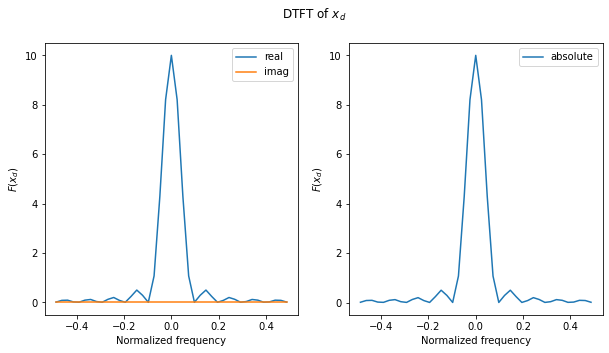

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(freq_shifted, xd_DTFT_shifted.real, label='real')
ax[0].plot(freq_shifted, xd_DTFT_shifted.imag, label='imag')
ax[0].set_xlabel("Normalized frequency")
ax[0].set_ylabel(r"$F(x_d)$")
ax[0].legend()

ax[1].plot(freq_shifted, np.abs(xd_DTFT_shifted), label='absolute')
ax[1].set_xlabel("Normalized frequency")
ax[1].set_ylabel(r"$F(x_d)$")
ax[1].legend()

plt.suptitle(r"DTFT of $x_d$")

- h) Show the effect of increasing $K$. Comment qualitatively. (2pts.)
 
 *Hint: repeat the precedure above in a loop with changing values of $K$ with a factor of [0.2, 0.5, 1, 5]*

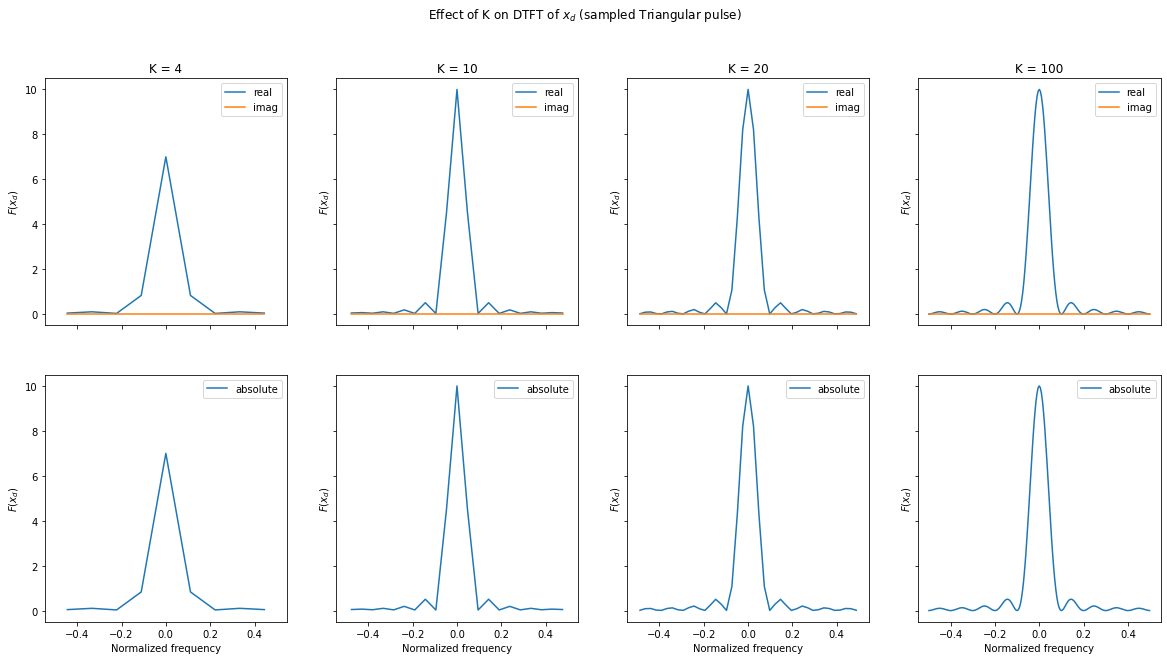

In [39]:
factors = np.array((0.2, 0.5, 1, 5))
fig, ax = plt.subplots(2, factors.size, sharex=True, sharey=True, figsize=(20, 10))

def plot_DTFT(K, ax):
    x_v = Tri(np.linspace(start=-K/F, stop=K/F, num=2*K+1), T)
    nuax = np.arange(0, 1, step=1/(2*K+1))
    x_v_DFT = np.fft.fft(x_v)
    xd_DTFT = np.multiply(x_v_DFT, np.exp(1j*nuax*2*np.pi*K))
    xd_DTFT_shifted = np.fft.fftshift(xd_DTFT)
    freq = nuax.copy()
    freq[freq > 0.5] = freq[freq > 0.5] - 1
    freq_shifted = np.fft.fftshift(freq)
    
    ax[0].plot(freq_shifted, xd_DTFT_shifted.real, label='real')
    ax[0].plot(freq_shifted, xd_DTFT_shifted.imag, label='imag')
    ax[0].set_title(f"K = {K}")
    ax[0].set_ylabel(r"$F(x_d)$")
    ax[0].legend()
    
    ax[1].plot(freq_shifted, np.abs(xd_DTFT_shifted), label='absolute')
    ax[1].legend()
    ax[1].set_xlabel("Normalized frequency")
    ax[1].set_ylabel(r"$F(x_d)$")
    
[plot_DTFT(int(K*factors[i]), ax[:, i]) for i in range(factors.size)]
plt.suptitle(r"Effect of K on DTFT of $x_d$ (sampled Triangular pulse)")
plt.show()

*As $K$ is increased, the DTFT becomes smoother (because the number of frequency increases linearly with $K$). Further, the peak of the DTFT also increases with $K$. The peak is triangular for small $K$ but becomes more curved (similar to a gaussian) as K is increased. Also, the width of the peak also seems to be decreasing with $K$.*

## From DTFT to CTFT
Now that we have a way to compute the DTFT, we try to use it to compute the CTFT of Tri. 

**Question 3**
- a) Can we in principle compute exactly the CTFT of the Tri function based on the sampled signal (without prior knowledge on the function)? (1 pt.)

*According to Nyquist sampling theorem, the CTFT of the signal can be computed from the sampled signal if the sampling rate is more than twice the bandwidth of the signal. Our signal is time-limited, which means that its Fourier transform will not be band-limited, which means that it does not have a bandwidth. Hence, we cannot compute the exact CTFT from the sampled signal.*

- b) Recall from the lecture an approximation of the CTFT by the DTFT of the sampled signal $x_d$ (1 pt.).

$$
CTFT x (f) \approx \frac{1}{F} DTFT x_d (\frac{f}{F})
$$

- c) Compute this approximation and plot it to compare the result to the analytical expression of the CTFT, that you can compute using CTFT convolution rules (3 pts.).

*Type answer here.*

*Hint 1: get physical frequencies by simply rescaling the centered $\nu$ (normalized frequency) axis*

In [27]:
phys_freq_shifted = freq_shifted * F

*Hint 2: compute analytical CTFT, estimated CFTF and plot both*

/Users/nsinghi/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


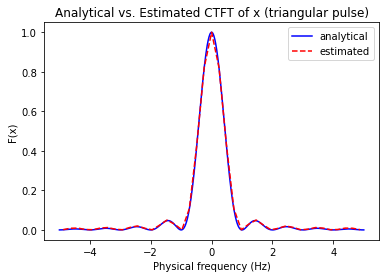

In [41]:
def analytical_CTFT(f):
    if f == 0:
        return 1
    else:
        return np.square(np.sin(np.pi*f)/(np.pi*f))

estimated_CTFT = xd_DTFT_shifted/F
plt.plot(np.linspace(-5, 5, 1000), [analytical_CTFT(f) for f in np.linspace(-5, 5, 1000)], label='analytical', color='blue')
plt.plot(phys_freq_shifted, estimated_CTFT, label='estimated', color='red', linestyle='--')#, linestyle=(0, (5, 10)))
plt.xlabel("Physical frequency (Hz)")
plt.ylabel("F(x)")
plt.title("Analytical vs. Estimated CTFT of x (triangular pulse)")
plt.legend()
plt.show()

- d) Show the effect of increasing $K$, comment qualitatively. (2 pts.)

*Hint: repeat the procedure in question 2 & 3 by scanning K with a factor of [0.2, 0.5, 1, 5]*

/Users/nsinghi/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/nsinghi/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/nsinghi/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/nsinghi/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


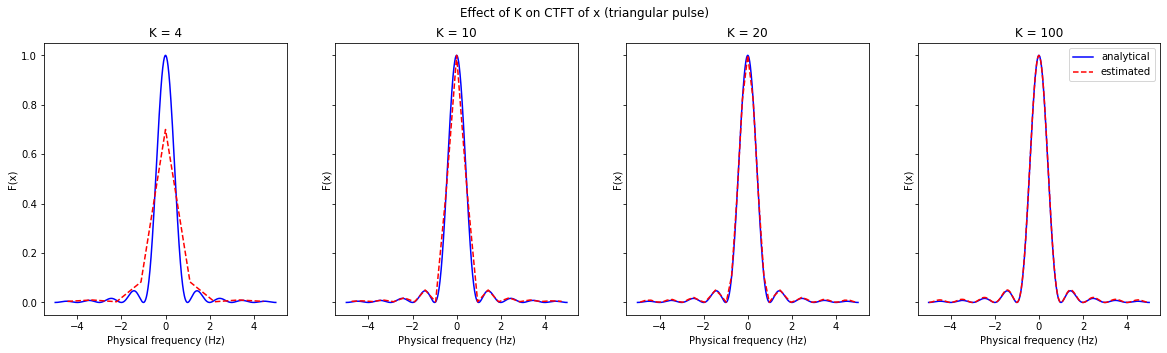

In [42]:
factors = np.array((0.2, 0.5, 1, 5))
fig, ax = plt.subplots(1, factors.size, sharex=True, sharey=True, figsize=(20, 5))

def plot_CTFT(K, ax):
    x_v = Tri(np.linspace(start=-K/F, stop=K/F, num=2*K+1), T)
    nuax = np.arange(0, 1, step=1/(2*K+1))
    x_v_DFT = np.fft.fft(x_v)
    xd_DTFT = np.multiply(x_v_DFT, np.exp(1j*nuax*2*np.pi*K))
    xd_DTFT_shifted = np.fft.fftshift(xd_DTFT)
    freq = nuax.copy()
    freq[freq > 0.5] = freq[freq > 0.5] - 1
    freq_shifted = np.fft.fftshift(freq)
    phys_freq_shifted = freq_shifted * F
    estimated_CTFT = xd_DTFT_shifted/F
    
    ax.plot(np.linspace(-5, 5, 1000), [analytical_CTFT(f) for f in np.linspace(-5, 5, 1000)], label='analytical', color='blue')
    ax.plot(phys_freq_shifted, estimated_CTFT, label='estimated', color='red', linestyle='--')#, linestyle=(0, (5, 10)))
    ax.set_xlabel("Physical frequency (Hz)")
    ax.set_ylabel("F(x)")
    ax.set_title(f"K = {K}")
    
[plot_CTFT(int(K*factors[i]), ax[i]) for i in range(factors.size)]
plt.suptitle(r"Effect of K on CTFT of x (triangular pulse)")
plt.legend()
plt.show()

*It can be seen that as $K$ is increased, the estimated CTFT becomes closer to the analytical CTFT.*

## Part 2: Convolution

### Boundary effects
Computing the convolution on finite sequences of signals is often done using the DFT, due to the computational efficiency of the FFT algorithm. As we have seen in the lecture, DFT relates circular convolutions of vectors to entry-wise products in the Fourier domain. As an example, consider the two length 5 vectors (indexed by $k=0,...,4$), $x=[1,1,1,0,0]^\top$ and $y=[1,0,0,0,1]^\top$.

**Question 4**: 
- a) Compute (by hand) the circular convolution 
$$
x\circ y[n]=\sum_{k=0}^{4}x[k]y[(n-k) \mbox{ mod } 5],\, n= 0,\dots,\,4\,,
$$
(where $k\mbox{ mod } 5$ is the remainder of the integer division by 5, such that: $-1 \mbox{ mod } 5=4,\,0 \mbox{ mod } 5=0,\, 5 \mbox{ mod } 5=0,\,6\mbox{ mod } 5= 1$, etc...). (2 pts.)

$$
x\circ y[n] = [2, 2, 1, 0, 1]^\top
$$

**(Please refer to handwritten notes for the computation)**

- b) Let $F_5$ be the 5 point DFT, check numerically using the numpy implementation of FFT (fft) and its inverse (ifft) that 
$x\circ y=F_5^{-1}(F_5 x \cdot F_5 y)$
where $\cdot$ denotes the entry-wise product. (1 pt.)


In [349]:
x = np.array([1, 1, 1, 0, 0])
y = np.array([1, 0, 0, 0, 1])

x_FFT = np.fft.fft(x)
y_FFT = np.fft.fft(y)

convolution = np.fft.ifft(np.multiply(x_FFT, y_FFT))
print(f"convolution = {np.round(convolution)}")

convolution = [2.+0.j 2.+0.j 1.+0.j 0.+0.j 1.+0.j]


**It can be seen that the convolution computed using np.fft and np.ifft is equal to the circular convolution computed by hand.**

- c) Compare the above result with the values of the discrete time convolution on the same points $n= 0...4,$ (computed by hand)
$$
x_{pad}* y_{pad}[n]=\sum_{k=-\infty}^{+\infty}x_{pad}[k]y_{pad}[n-k],\, n= 0..4\,,
$$
where $x_{pad}$ is the zero padded version of signal $x$
$$
x_{pad}[n]=
\begin{cases}
x[n], \mbox{ if } n\in\{0,...,4\}\,,\\
0, \mbox{otherwise}\,.
\end{cases}
$$
At which points do they differ and why? (2 pts.)


$$
x_{pad} * y_{pad} [n] = [1, 1, 1, 0, 1]
$$

**(Please refer to handwritten notes for the computation)**

$x_{pad} * y_{pad}$ differs from $x \circ y$ for n = 0 and 1. The difference arises because in circular convolution, the "kernel" signal is repeated outside the support of the signal, whereas in discrete convolution, the kernel signal is zero outside its support. The two types of convolution are equivalent when $n$ is such that the kernel signal, when flipped and shifted, lies completely within the support of the other signal. If it lies outside, then the two convolutions would be different from each other.

There are some differences between the circular and discrete convolutions, that we can call boundary effects. Let us investigate which points are affected by such issues. We consider now the convolution of an arbitrary discrete (1d) signal $x$ with a ``convolution kernel'' (just a usual name for a signal used to convolved other signals with) $h$ which takes at most $2w+1$ non-zero values, located by the index set $\{-w,\dots,w\}$, for some positive integer $w$.

**Question 5**
- a) Assume $x[k]$ is known only for $k\in \{0,\dots, N-1\}$, with $N$ much larger than $w$ ( $2w+1< N$ at least), for which values $n$  can we compute $x*h[n]$ without ambiguity? (2 pts.)

*Hint: write down the expression of the discrete time convolution and check for each term which values of $x$ are required.*

$$
w \leq n \leq N-w-1
$$

**(Please refer to handwritten notes for the computation)**

- b) Show we can evaluate $x*h$ for those points defined in Q.5-a using the N-point circular convolution of vector 
$$
x=[x[0],\dots, x[N-1]]^\top\,,
$$
with the length $N$ zero-padded rearranged convolution kernel
$$
h_r=[h[0],\dots,h[w],0,\,\dots,0,\,h[-w],\dots,\,h[-1] ]
$$ (**2 bonus pts.**)

*Hint: check that the expressions of $x*h$ and $x\circ h_r$ coincide for the range of values defined in the above question (compare especially the values of $h$ and $h_r$ in these expressions).*
*Type answer here.*

**(Please refer to handwritten notes for the proof)**


- c) Illustrate this approach numerically for the signal $x=[1,1,1,0,0]$ and 
$$
h[k]=\begin{cases}1 \mbox{ if } k=1,\,\\-1 \mbox{ if } k=-1,\\0,\,\mbox{otherwise.}\end{cases}
$$ (3 pts.)

*Hint: use the numpy function cat to define $h_r$ and compute circular convolution using fft and ifft algorithms. Plot the result emphasizing the range of indices for which we have guaranties that the convolution value is unambiguiously defined, and compare to the true value of $x*h$ computed by hand*.

$$
x * h [n] = [0, 1, 1], n = 1, 2, 3
$$

**(Please refer to handwritten notes for the computation)**

convolution =  [-1.+0.j  0.+0.j  1.+0.j  1.+0.j -1.+0.j]


/Users/nsinghi/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


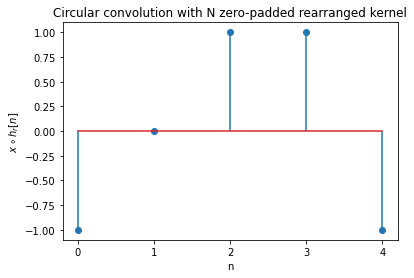

In [357]:
x = np.array((1, 1, 1, 0, 0))

h_r = np.zeros(x.shape)
h_r[1] = 1
h_r[-1] = -1

convolution = np.fft.ifft(np.fft.fft(x)*np.fft.fft(h_r))
print("convolution = ", np.round(convolution))
plt.stem(convolution)
plt.xlabel("n")
plt.ylabel(r"$x \circ h_r [n]$")
plt.xticks(range(x.size))
plt.title("Circular convolution with N zero-padded rearranged kernel")
plt.show()

*Discrete convolution computed by hand is in agreement with circular convolution computed using np.fft and np.ifft (for n = 1, 2, 3)*

### Using PyTorch 2d convolutional layers
Convolutions are widely used in deep neural network architectures, notably 2d convolutions. 2d convolutions are defined on 2d discrete signals by applying successively 1d convolutions along each dimensions. For infinite sequences, this takes the form
$$
x*h[m,n]=\sum_k \sum_l x[k,l] h[m-k,n-l]
$$

Perhaps surprizingly, convolutional layers such as those available in the PyTorch deep learning library do not implement convolutions, but a [cross-correlation](https://en.wikipedia.org/wiki/Cross-correlation) operation between deterministic signals. We denote this operation by $x\star y$ (in contrast to convolution $x*y$). This is defined as 
$$
x*h[m,n]=\sum_k \sum_l x[k,l] h[m+k,n+l]\,.
$$
Importantly, it is easy to show that cross-correlation can be implemented by convolution of $x$ with the ``mirrored'' convolution kernel defined for all 2d indices $(k,l)$ as
$$
h_{\sigma}[k,l]=h_{\sigma}[-k,-l]\,,
$$
such that 
$$
x\star h= x*h_{\sigma}\,.
$$

A 2d convolutional layer in a neural network generally applies multiple convolution operations to multiple 2d input signals (the input channels), to output multiple 2d signals (the output channels). The key parameter of such layer is the convolution kernel which is organized as a 4 dimensional tensor $h$, where $h(i,j,.,.)$ is the convolution that is applied between input channel $j$ and output channel $i$. Input and output tensor have moreover as first 'batch dimension' designed to apply the same operation on multiple input samples. Overall,  given $B$ batch samples of $N_i$ input channels, each containing a $d_1\times d_2$ 2d signal, the 4d input tensor is $(B,N_i,N,M)$ and the output $y$ wtih $N_o$ channels has dimension $(B,N_o,N,M)$. For a batch sample $b$, and output channel $i$, we get the sum of the convolutions applied to each input channel $j$, for the same batch sample $b$:
$$
y[b,i,m,n]=\sum_{j=0}^{N_i} \sum_{k=0}^{d_1} \sum_{l=0}^{d_2} x[b,j,k,l] h[i,j,m+k,n+l]\,.
$$

As in the above question (for the 1d case), we will restrict ourselves to 2d convolution kernels that take non-zero values for $(k,l)\in [-w_1,\dots,w_1]\times [-w_2,\dots,w_2]$.
As elaborated above, convolution of finite sequences leads to boundary effects.  In order to avoid them, the output channels are trucated to the output indices $[w_1,d_1-w_1-1]\times [w_2,d_2-w_2-1]$ 2d signals.


We now use the PyTorch library to implement 2D convolutions with a convolutional layer. In short, PyTorch works similarly as numpy, by replacing numpy.array object by torch.tensor objects. The key difference being that each time a tensor is defined, possibly as a function of other tensors, PyTorch builds by defauld a computational graph that allows gradient backpropagation (using automated differentiation). This allows optimization of the tensor expression through automated differentiation. We will not use the optimization capabilities of PyTorch, but just have a look into the functioning of convolutional layers for fixed parameters. 

First, we load the torch library and the sublibrary dedicated to neural network building blocks.

In [43]:
import torch
from torch import nn

Check the documentation of the 2d conv layer at
https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
Do not focus on the neural network specific attributes stride/padding/dilation/groups that we keep to default. 

In [297]:
torch.nn.Conv2d?


We will use no bias (bias=False), and at first use a single convolution, thus we design a conv layers with one single input channel and one single output channel.  Here we set the dimension of the kernel to 10 for both dimensions.

In [116]:
convLayer = nn.Conv2d(1, 1, (3,3), stride=1, padding=0, dilation=1, groups=1, bias=False, padding_mode='zeros')

We extract the parameters of the layer. 

In [117]:
params = [p for p in convLayer.parameters()]

The first one is the convolution kernel. We set the requires_grad property to False in order to be able to directly assign values to it.

In [118]:
params[0].requires_grad = False


We have set odd convolution kernel dimensions $(2*w_1+1)\times (2*w_2+1)$ with $w_1=w_2=1$, such that the two last dimensions of this parameters correspond to the sequence indices $-w_1,\dots,w_1$ and $-w_2,\dots,w_2$ respectively.

In [119]:
params[0].shape

torch.Size([1, 1, 3, 3])

As an example, to use an impulse kernel defined as
$$
h[k,l]=\begin{cases}
1, \mbox{ if } (k,l)=(1,1) \\
0, \mbox{ otherwise}.
\end{cases}
$$
we just need to create a zero (1x1x3x3) array, set the coordinate $(0,0,2,2)$ to $1$ (as this correspond to the 2d sequence index pair $(1,1)$ as explained above). 
Assignement is done with the copy_ method as follows. (We use the .detach() method to avoid computing unecessary gradients).


In [120]:
h = torch.zeros(1,1,3,3)
h[0,0,2,2]=1
params[0].copy_(h.detach())

Parameter containing:
tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 1.]]]])

**Question 6** 
- a) Compute and show (using the matplotlib imshow function) the output of this layer for a toy input of dimension 1x1x10x10 such that the 10x10 image takes values 1 on a 3x2 rectangle located around the center of the image (to avoid boundary effects), and zero otherwise. (2 pts.)

*Hint: use torch.zeros to define the 4d input tensor with the right shape, use the torch.tensor.squeeze() method to get rid of singleton dimensions* in the output.

Text(0.5, 1.0, 'Output')

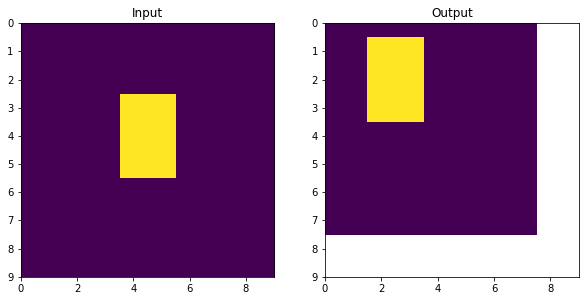

In [121]:
x = torch.zeros(1,1,10,10)
x[0, 0, 3:6, 4:6] = 1
y = convLayer(x)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(x.squeeze())
ax[0].set_title("Input")
ax[0].set_ylim(9, 0)
ax[0].set_xlim(0, 9)


ax[1].imshow(y.squeeze())
ax[1].set_ylim(9, 0)
ax[1].set_xlim(0, 9)
ax[1].set_title("Output")

- b) For an arbitrary 2d infinite sequence, compute theoretically the expression of the output $x*h$ of a convolution for the impulse kernel $h$ defined above. Interpret the result: does the layer behaves as expected? (**2 bonus pts.**)

*Hint: take into account the truncation of output indices mentioned above when comparing input and output. Keep in mind the layer implements a cross-correlation operation, not a convolution.*

$$
x*h[m,n]=\sum_k \sum_l h[k,l] x[m-k,n-l]
$$

$h[k,l]$ is non-zero only when $(k, l) = (1, 1)$. Hence, the above expression can be written as:

$$
x*h[m,n]= h[k,l] x[m-k,n-l] \rvert_{k = 1, l = 1} \\
x*h[m,n]= x[m-1,n-1] 
$$

Using $h[1,1] = 1$.

We would predict that the convolution is the same function shifted towards bottom right. However, we observe the opposite effect in the figure shown above. Hence, the conv2d layer is not behaving as expected. This is because it is actually computing a cross-correlation, and not a convolution.

If we invert the kernel, then, the output of the conv2d layer would be consistent with our prediction about the convolution: (I set padding = 1 to make the output shape equal to the input shape)

In [123]:
convLayer = nn.Conv2d(1, 1, (3,3), stride=1, padding=1, dilation=1, groups=1, bias=False, padding_mode='zeros')
params = [p for p in convLayer.parameters()]
params[0].requires_grad = False
h = torch.zeros(1,1,3,3)
h[0,0,0,0]=1
params[0].copy_(h.detach())

Parameter containing:
tensor([[[[1., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]])

Text(0.5, 1.0, 'Output with inverted kernel')

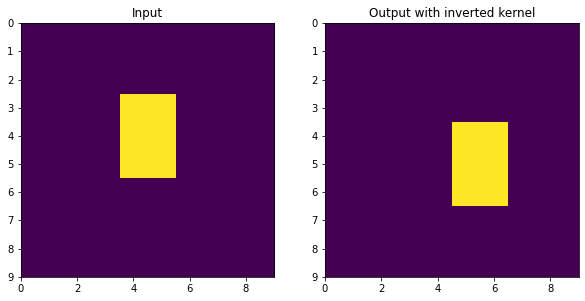

In [125]:
x = torch.zeros(1,1,10,10)
x[0, 0, 3:6, 4:6] = 1
y = convLayer(x)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(x.squeeze())
ax[0].set_title("Input")
ax[0].set_ylim(9, 0)
ax[0].set_xlim(0, 9)


ax[1].imshow(y.squeeze())
ax[1].set_ylim(9, 0)
ax[1].set_xlim(0, 9)
ax[1].set_title("Output with inverted kernel")

As an example of neuroimaging data, we load a horizontal slice of a structural MRI of a human brain based on the python code available at this webpage
https://www.datacamp.com/community/tutorials/matplotlib-3d-volumetric-data

In [71]:
import tempfile
# Create a temporary directory
d = tempfile.mkdtemp()

import os
from urllib.request import urlretrieve

# Define URL
url = 'http://www.fil.ion.ucl.ac.uk/spm/download/data/attention/attention.zip'

# Retrieve the data
fn, info = urlretrieve(url, os.path.join(d, 'attention.zip'))

import zipfile

# Extract the contents into the temporary directory we created earlier
zipfile.ZipFile(fn).extractall(path=d)
import nibabel
# Read the image 
struct = nibabel.load(os.path.join(d, 'attention/structural/nsM00587_0002.hdr'))

# Get a plain NumPy array, without all the metadata
struct_arr = struct.get_fdata()
# from google.colab import output
# output.clear()
mriImg = struct_arr.T[55]

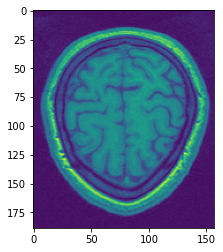

In [72]:
#plt.imshow(struct_arr2[55],vmin=0,vmax=200)
plt.imshow(mriImg)
plt.show()

We convert the slice into a torch tensor of the right dimension, and convert to float for compatibility with the conv layer parameters.

In [73]:
img = torch.tensor(mriImg).float()
img = img.unsqueeze_(0).unsqueeze_(0)

There are many low level processing task that can be applied to such images in order to enhance relevant information. Here we focus on the extracting edges from this images, that reflect the boundaries between different tissues (bone, white and gray matter, etc...). On classical approach to perform such task is the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator).
It consists in applying two convolution kernels $G_1$ and $G_2$, to detect horizontal and vertical edges. Each kernel is defined in order to smooth the pixel values along the edge directon, while contrasting the values achieved on each side of the edge. This is implemented by using 3x3 kernels associated to the arrays (again the middle points indicate the zero index of the sequence)
$$
g_1[-1\dots1,-1\dots1]=\left[\begin{array}{ccc}
1 & 0 & -1\\
2 & 0 &-2\\
1 & 0 &-1
\end{array}\right]
$$
and
$$
g_2[-1\dots1,-1\dots1]=\left[\begin{array}{ccc}
 1 & 2 & 1\\
0 & 0 & 0\\
-1 & -2 & -1
\end{array}\right]
$$
The presence of vertical and horizontal edges in input image $I$ is reflected by the (entry-wise) squared values of the convolutions $(I* g_1)^2$ and $(I* g_2)^2$.

The presence of edges in any direction is then reflected by the square root of the average $\sqrt{(I* g_1)^2+(I* g_2)^2}$ 

**Question 7**: Taking inspiration of the above example, use a single convolution layer to implement the Sobel operator, apply it the brain slice image and show the final result. (3 pts.)

*Hint: define a convolution layer with two output channels, one for convolution by $g_1$, one for convolution by $g_2$. Use (among other tools) the torch.tensor() constructor  to build the kernel from a list of coefficients.*

In [74]:
convLayer2 = nn.Conv2d(1, 2, (3,3), stride=1, padding=0, dilation=1, groups=1, bias=False, padding_mode='zeros')

In [75]:
params2 = [p for p in convLayer2.parameters()]
params2

[Parameter containing:
 tensor([[[[ 0.0316, -0.0889,  0.1301],
           [ 0.1023, -0.0442,  0.0007],
           [ 0.1834, -0.2977, -0.0660]]],
 
 
         [[[-0.3220, -0.1002,  0.1151],
           [-0.0123,  0.1584, -0.0127],
           [ 0.0414,  0.0321, -0.2607]]]], requires_grad=True)]

In [76]:
params2[0].requires_grad = False

In [80]:
g = torch.zeros(2,1,3,3)
g[0, 0, :, :] = torch.tensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
# g[0, 0, :, :] = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
g[1, 0, :, :] = torch.tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

params2[0].copy_(g.detach())

Parameter containing:
tensor([[[[ 1.,  0., -1.],
          [ 2.,  0., -2.],
          [ 1.,  0., -1.]]],


        [[[ 1.,  2.,  1.],
          [ 0.,  0.,  0.],
          [-1., -2., -1.]]]])

In [81]:
y2 = convLayer2(img)

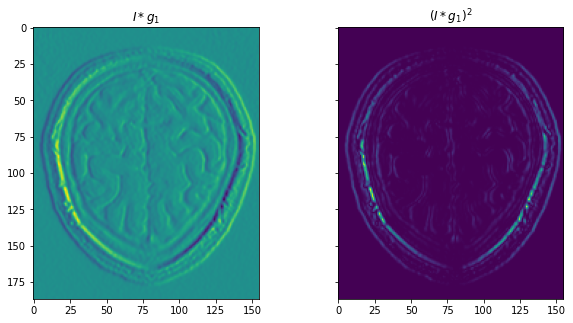

In [128]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
I_conv_g1 = y2[0, 0, :, :].squeeze() 

ax[0].imshow(I_conv_g1)
ax[0].set_title(r"$I * g_1$")
ax[1].imshow(np.square(I_conv_g1))
ax[1].set_title(r"$(I * g_1)^2$")
plt.show()

Above image mostly contains vertical edges of the original image, which is because we convoluted it with $g_1$ (vertical edge detector).
It can be noted that the conv2d layer does not perform an actual convolution. In order to compute the actual convolution, one would have to first flip the tensor $g_1$. However, the only difference that would make is that instead of detecting dark-to-light transition edges, light-to-dark edges would be detected.

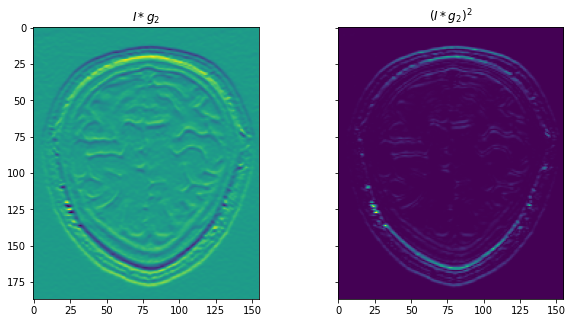

In [127]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))
I_conv_g2 = y2[0, 1, :, :].squeeze() 

ax[0].imshow(I_conv_g2)
ax[0].set_title(r"$I * g_2$")
ax[1].imshow(np.square(I_conv_g2))
ax[1].set_title(r"$(I * g_2)^2$")
plt.show()

Above image mostly contains horizontal edges of the original image, which is because we convoluted it with $g_2$ (horizontal edge detector)

This example illustrates how low level image processing task may combine linear convolution operations element-wise non-linearities. Modern deep learning approaches, in a sense, extend these capabilities by learning the kernels and the non-linearities from data.

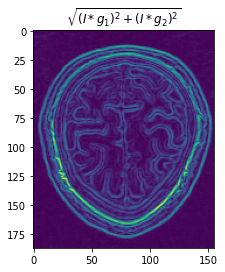

In [126]:
plt.imshow(np.sqrt(np.square(I_conv_g1) + np.square(I_conv_g2)))
plt.title(r"$\sqrt{(I * g_1)^2 + (I * g_2)^2}$")
plt.show()